Исследование языка части корпуса японской классической литературы Аозора [Статья на википедии](https://ru.wikipedia.org/wiki/%D0%90%D0%BE%D0%B4%D0%B7%D0%BE%D1%80%D0%B0-%D0%B1%D1%83%D0%BD%D0%BA%D0%BE)

In [ ]:
# установка токенизатора
! pip install fugashi[unidic-lite]

In [ ]:
# Облако слов
! pip install wordcloud

In [ ]:
# импорт токенизатора
import fugashi

In [ ]:
# импорт необходимых библиотек
import os
from collections import Counter
import nltk
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd
import spacy
from nltk import FreqDist

In [ ]:
!python3 -m spacy download ja_core_news_md
nlp = spacy.load("ja_core_news_md")

2023-12-19 09:40:45.416929: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 09:40:45.416998: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 09:40:45.418763: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-19 09:40:49.029433: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 13.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ja_core_news_md')


In [ ]:
# Шрифты для графиков на японском
!wget https://oscdl.ipa.go.jp/IPAexfont/IPAexfont00301.zip
!unzip IPAexfont00301.zip
# Шрифт для облака слов
#!wget https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKjp-hinted.zip
#!unzip NotoSansCJKjp-hinted.zip

--2023-12-19 11:04:51--  https://oscdl.ipa.go.jp/IPAexfont/IPAexfont00301.zip
Resolving oscdl.ipa.go.jp (oscdl.ipa.go.jp)... failed: Name or service not known.
wget: unable to resolve host address ‘oscdl.ipa.go.jp’
unzip:  cannot find or open IPAexfont00301.zip, IPAexfont00301.zip.zip or IPAexfont00301.zip.ZIP.
--2023-12-19 11:04:52--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKjp-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 64.233.182.207, 64.233.183.207, 173.194.193.207, ...
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|64.233.182.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121096772 (115M) [application/zip]
Saving to: ‘NotoSansCJKjp-hinted.zip.1’

NotoSansCJKjp-hinte 100%[===================>] 115.49M   211MB/s    in 0.5s    

2023-12-19 11:04:52 (211 MB/s) - ‘NotoSansCJKjp-hinted.zip.1’ saved [121096772/121096772]

Archive:  Not

In [ ]:
 %matplotlib inline

In [ ]:
path = '/content/texts'

In [ ]:
os.listdir(path)

FileNotFoundError: ignored

In [ ]:
# загрузка корпуса
corpus = ''
for filename in os.listdir(path):
  if '.ipynb' not in filename:
    with open(path+"/"+filename) as f:
        corpus += f.read()

In [ ]:
with open('/content/Aozora1-10.txt') as f:
  corpus = f.read()

In [ ]:
# ознакомление с корпусом
corpus[:1000]

'\ufeff安吾の新日本地理\n安吾・伊勢神宮にゆく\n坂口安吾\n\n\n\n\u3000この元日に飛行機にのった。三月ごろから内地に航空路ができるについて読売新聞で試験飛行をやった。それに乗ったのである。ノースウエスト航空会社のＤＣ四型という四発機。四千五百メートルぐらいの高度で大阪まで往復したのだが、戦前までの航空旅行の概念とはよほど違っている。煖房は完備しているし、どういう仕掛だか空気は常に室内に充満しているし、雲海の上へでるとアスファルトの路上を高級自動車で走るよりも動揺がないし、プロペラの音に妨げられずに会話ができるし、両耳へ無電かなんかの管をはめこんだ飛行士はタバコを吸いチューインガムをかみ談笑しながらノンビリ運転しているし、人間の深刻な動作や表情を全く必要としない機械や計器が完備しているらしい。障害物がないだけ自動車よりも面倒がいらないという感じで、不安というものは感じられない。読売新聞社のビラを空からまくために六百メートルの低空で東京の上空を二周したが、この時だけは参った。図体の大きな飛行機が窮屈そうに身をかしげて、甚しい緩速で旋回飛行をやるというのが無理なんだね。エレベーターの沈下するショックが間断なくつづき、今にも失速して落ちるかと思うこと頻りである。大阪まで一時間で飛ぶ飛行機が、わざわざ二十何分もかかって東京を二周したのだから。三分もたつと、みんな顔面蒼白となり、言葉を失ってノビたのである。この航空旅行ができることによって、私も日本地理を書くことになったが、したがって航空旅行ができるまでは、遠方を飛び歩くことができない。\n\u3000元日の午前十時に丸ビルのノースウエスト航空会社へ集合することになっていた。伊東に住む私は前日から小石川の「モミヂ」に泊りこみ、増淵四段と碁をうって大晦日を送るという平穏風流な越年ぶり。\n\u3000さて元旦九時半に出動する。このとき呆れたことには、元旦午前というものは、大東京に殆ど人影がないのだね。時々都内電車だけが仕方がねえやというようにゴットンゴットン走っているだけだ。さすがに犬は歩いているよ。後楽園の競輪場も野球場も人がいないし、省線電車の出入口にも人の動きが見当らないという深夜のような白昼風景。ところが、ですよ。この自動車がいよいよ皇居前にさしかかった時に、驚くべし。東京駅と二重橋の間だけは、続々と

In [ ]:
# токенизация корпуса
tagger = fugashi.Tagger()
corpus_tok = [word.surface for word in tagger(corpus[:10000])]
print(corpus_tok[:10])

['\ufeff', '安吾', 'の', '新', '日本', '地理', '安吾', '・', '伊勢', '神宮']


In [ ]:
# оставляем только слова, убираем цифры и знаки препинания
corpus_without_punkt = []
for word in corpus_tok:
    if word[0].isalpha():
        corpus_without_punkt.append(word)

In [ ]:
corpus_without_punkt[:10]

['安吾', 'の', '新', '日本', '地理', '安吾', '伊勢', '神宮', 'に', 'ゆく']

In [ ]:
# Посчитаем количество токенов в корпусе
print(len(corpus_without_punkt))

5876


In [ ]:
# Выведем тридцать наиболее частотных слов
print(Counter(corpus_without_punkt).most_common(30))

[('の', 427), ('に', 277), ('が', 197), ('て', 192), ('は', 182), ('で', 178), ('を', 169), ('た', 159), ('と', 156), ('も', 88), ('ある', 81), ('し', 78), ('だ', 75), ('いう', 73), ('ない', 69), ('か', 50), ('から', 40), ('いる', 40), ('こと', 37), ('な', 33), ('もの', 33), ('神', 31), ('その', 29), ('れ', 28), ('あっ', 27), ('へ', 25), ('よう', 23), ('この', 22), ('い', 21), ('猿田彦', 21)]


Из списка выше видно, что почти все отобранные слова написаны азбукой, а не иероглифами. Это служебные частицы, выражающие падеж, время, вид и др.

In [ ]:
# Загрузим список стоп-слов и посчитаем их
with open('sw_ja.txt', 'r', encoding='utf-8') as f:
  sw3 = f.read()

print(len(sw3))

1466


In [ ]:
# Очистим корпус от стоп-слов
corpus_clean3 = []
for word in corpus_without_punkt:
  if word not in sw3:
    corpus_clean3.append(word)

In [ ]:
# Выведим наиболее частотные слова очищенного корпуса
common_words = Counter(corpus_clean3).most_common(30)
for word in common_words:
  print("Word: {}, frequency: {}".format(word[0], word[1]))

Word: 神, frequency: 31
Word: 猿田彦, frequency: 21
Word: 蘇民, frequency: 21
Word: 日本, frequency: 19
Word: 伊勢, frequency: 17
Word: 天皇, frequency: 15
Word: 五十鈴, frequency: 13
Word: 知れ, frequency: 13
Word: 神社, frequency: 13
Word: 人気, frequency: 11
Word: 征服, frequency: 11
Word: 宇治, frequency: 10
Word: 神話, frequency: 10
Word: 将来, frequency: 10
Word: 大, frequency: 9
Word: 雑草, frequency: 9
Word: 案内, frequency: 9
Word: 神宮, frequency: 8
Word: 飛行, frequency: 8
Word: 航空, frequency: 8
Word: 山田, frequency: 8
Word: ツ, frequency: 8
Word: 民間, frequency: 8
Word: スサノオ, frequency: 8
Word: 大国主, frequency: 8
Word: 親分, frequency: 8
Word: 子孫, frequency: 8
Word: 機, frequency: 7
Word: 如く, frequency: 7
Word: 川, frequency: 7


Из списка выше видно, что после удаления стоп-слов почти все токены записаны иероглифами. Это значимые части речи, в основном существительные.

посчитать сколько всего токенов и ключевых слов

In [ ]:
# Проверим количество токенов в корпусе после удаления стоп-слов
len(corpus_clean3)

2298

In [ ]:
# Превратим чистый корпус в строку для дальнейших преобразований
str_corpus = str(corpus_clean3)
str_corpus = str_corpus.replace(',','')
str_corpus = str_corpus.replace('\'','')
str_corpus = str_corpus.replace('[','')
str_corpus = str_corpus.replace(']','')
str_corpus[:20]

'安吾 日本 地理 安吾 伊勢 神宮 ゆく'

In [ ]:
# Лемматизируем чистый корпус
lemmas = nlp(str_corpus)
lemmas[:20]

安吾 日本 地理 安吾 伊勢 神宮 ゆく 坂口 安吾 元日 飛行 機 のっ 内地 航空 路 読売 新聞 試験 飛行

Среди лемм видно много существительных и гораздо меньше глаголов. Выведем части речи.

In [ ]:
for word in lemmas:
  lemma_pos = word.lemma_ + '_' + word.pos_
  print(lemma_pos)

安吾_NOUN
日本_PROPN
地理_NOUN
安吾_NOUN
伊勢_PROPN
神宮_NOUN
ゆく_VERB
坂口_PROPN
安吾_NOUN
元日_NOUN
飛行_NOUN
機_NOUN
のっ_NOUN
内地_NOUN
航空_NOUN
路_NOUN
読売_NOUN
新聞_NOUN
試験_NOUN
飛行_NOUN
やる_NOUN
乗る_NOUN
ノース_PROPN
ウエスト_NOUN
航空_NOUN
会社_NOUN
DC_NOUN
型_NOUN
発機_NOUN
四千_NOUN
五百_NOUN
メートル_NOUN
ぐらい_ADP
高度_ADJ
大阪_PROPN
往復_NOUN
戦前_NOUN
航空_NOUN
旅行_NOUN
概念_NOUN
よほど_ADV
違う_NOUN
煖房_NOUN
完備_NOUN
どう_ADV
仕掛_NOUN
空気_NOUN
常_NOUN
室内_NOUN
充満_ADJ
雲海_NOUN
でる_VERB
アスファルト_NOUN
路上_NOUN
高級_NOUN
自動_NOUN
車_NOUN
走る_VERB
動揺_NOUN
プロペラ_NOUN
音_NOUN
妨げ_NOUN
会話_NOUN
両耳_NOUN
無電_NOUN
なん_PRON
か_ADP
管_NOUN
はめる_VERB
こむ_VERB
飛行_NOUN
タバコ_NOUN
吸う_NOUN
チューインガム_NOUN
かみ_NOUN
談笑_NOUN
ノンビリ_NOUN
運転_NOUN
人間_NOUN
深刻_NOUN
動作_NOUN
表情_NOUN
全く_ADV
必要_NOUN
機械_NOUN
計器_NOUN
完備_VERB
らしい_AUX
障害_NOUN
物_NOUN
自動_NOUN
車_NOUN
面倒_NOUN
いら_NOUN
不安_ADJ
読売_NOUN
新聞_NOUN
社_NOUN
ビラ_NOUN
空_NOUN
まく_VERB
六百_NOUN
メートル_NOUN
低空_NOUN
東京_PROPN
上空_NOUN
周_NOUN
参る_VERB
図体_ADJ
大きな_ADJ
飛行_NOUN
機_NOUN
窮屈_NOUN
身_NOUN
かしげる_ADV
甚しい_NOUN
緩速_NOUN
旋回_NOUN
飛行_NOUN
やる_VERB
無理_NOUN
エレベーター_NOUN
沈下_NOUN
ショック

In [ ]:
# Напишем функцию для создания таблицы, в которую соберем основную информацию о корпусе
def create_table(dataset):
    lemmas = []
    pos = []
    morph = []

    data = nlp(dataset)

    for token in data:
        lemmas.append(token.lemma_)
        pos.append(token.pos_)
        morph.append(token.morph)

    df = pd.DataFrame({
                'Lemma': lemmas,
                'POS': pos,
                'Morphology': morph}
                    )

    return df

In [ ]:
final_df = create_table(str_corpus)
final_df[:20]

,Lemma,POS,Morphology
0,安吾,NOUN,(Reading=アンゴ)
1,日本,PROPN,(Reading=ニッポン)
2,地理,NOUN,(Reading=チリ)
3,安吾,NOUN,(Reading=アンゴ)
4,伊勢,PROPN,(Reading=イセ)
5,神宮,NOUN,(Reading=ジングウ)
6,ゆく,VERB,"(Inflection=五段-カ行;終止形-一般, Reading=ユク)"
7,坂口,PROPN,(Reading=サカグチ)
8,安吾,NOUN,(Reading=アンゴ)
9,元日,NOUN,(Reading=ガンジツ)


На первый взгляд в корпусе преобладают существительные. Также присутствуют глаголы. В отдельную категорию выделяются имена собственные PROPN. В столбце Morphology указаны чтения слов, а также грамматическая информация (форма глагола).

In [ ]:
# Выведем количество всех частей речи в корпусе
final_df['POS'].value_counts()

NOUN     1396
PROPN     359
VERB      309
ADV       103
ADJ        75
AUX        47
ADP        31
CCONJ      21
SCONJ       5
PRON        4
PART        3
SYM         2
NUM         2
DET         1
Name: POS, dtype: int64

Все 5 наиболее частотных частей речи - существительные, имена собственные, глаголы, наречия, прилагательные - являются значимыми частями речи. Среди служебных частей речи наиболее распространёнными являются вспомогательные глаголы (AUX).

In [ ]:
# Соберем корпус только из 5 наиболее частотных значимых частей речи: существительные, имена собственные, глаголы, наречия, прилагательные
significant_pos = final_df[(final_df['POS']=='NOUN') | (final_df['POS']=='VERB') | (final_df['POS']=='PROPN') | (final_df['POS']=='ADJ') | (final_df['POS']=='ADV')]
significant_pos[:20]

,Lemma,POS,Morphology
0,安吾,NOUN,(Reading=アンゴ)
1,日本,PROPN,(Reading=ニッポン)
2,地理,NOUN,(Reading=チリ)
3,安吾,NOUN,(Reading=アンゴ)
4,伊勢,PROPN,(Reading=イセ)
5,神宮,NOUN,(Reading=ジングウ)
6,ゆく,VERB,"(Inflection=五段-カ行;終止形-一般, Reading=ユク)"
7,坂口,PROPN,(Reading=サカグチ)
8,安吾,NOUN,(Reading=アンゴ)
9,元日,NOUN,(Reading=ガンジツ)


In [ ]:
# Посчитаем количество значимых частей речи
significant_pos2 = significant_pos.groupby(['POS'])['Lemma'].count()
significant_pos2

POS
ADJ        75
ADV       103
NOUN     1396
PROPN     359
VERB      309
Name: Lemma, dtype: int64

In [ ]:
df1 = pd.DataFrame(data=significant_pos2.index, columns=['POS'])
df2 = pd.DataFrame(data=significant_pos2.values, columns=['Counts'])
df3 = pd.merge(df1, df2, left_index=True, right_index=True)
df3

,POS,Counts
0,ADJ,75
1,ADV,103
2,NOUN,1396
3,PROPN,359
4,VERB,309


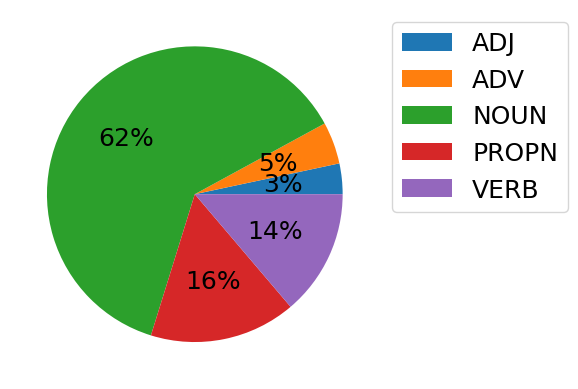

<Figure size 1600x1200 with 0 Axes>

In [ ]:
plt.pie(df3['Counts'],autopct='%1.0f%%')
plt.legend(df3['POS'], bbox_to_anchor=(1, 1))
plt.figure(figsize=(16, 12))
plt.show()

In [ ]:
# Посмотрим на наиболее частотные леммы среди значимых частей речи
frequency_distribution_1 = FreqDist(significant_pos['Lemma'])
frequency_distribution_1

FreqDist({'神': 31, '猿田彦': 21, '蘇民': 21, '日本': 19, '伊勢': 17, '知る': 17, '天皇': 15, '思う': 13, '五十鈴': 13, '神社': 13, ...})

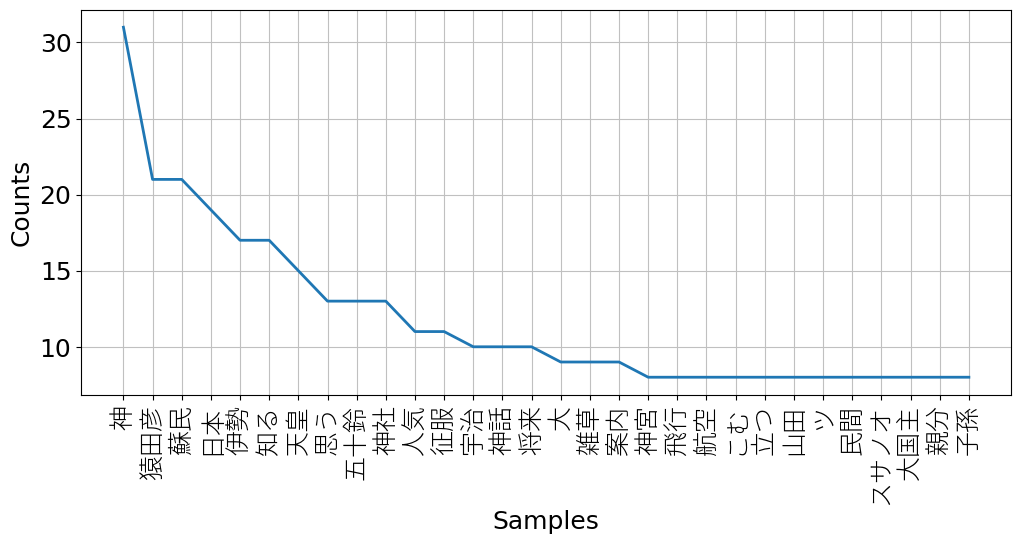

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
font_properties = font_manager.FontProperties(fname='NotoSansCJKjp-Light.otf')
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90,fontproperties=font_properties)
frequency_distribution_1.plot(30, cumulative=False)

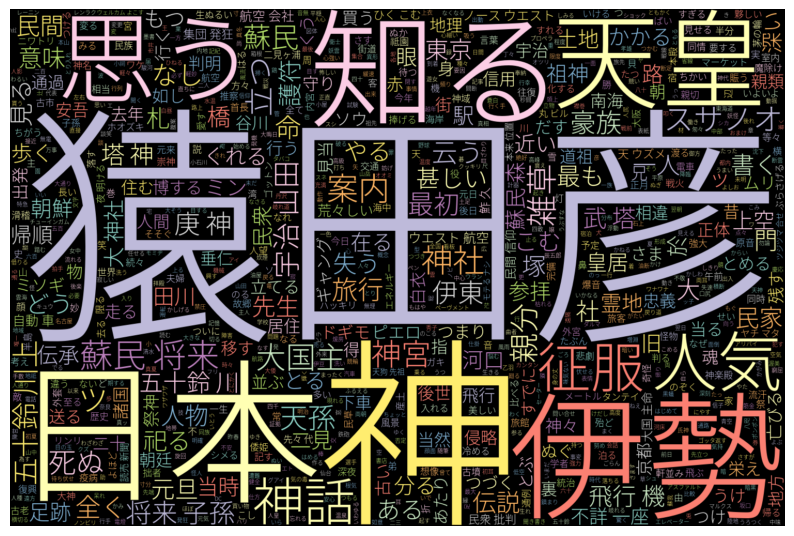

In [ ]:
# Выведем облако слов

# загрузка японского шрифта
font_path = 'NotoSansCJKjp-Light.otf'

wordcloud2 = WordCloud(width=1500,
                      height=1000,
                      background_color='black',
                      max_words=900,
                      colormap='Set3',
                      font_path=font_path,
                      normalize_plurals=True).generate(' '.join(significant_pos['Lemma']))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()